In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pyod.models.ecod import ECOD
from pyod.models.lunar import LUNAR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


In [3]:
sat = pd.read_csv(r'C:\Users\purav\OneDrive\Desktop\Comparative Evaluation of Anomaly Detection Algorithms\Comparative-Evaluation-of-Anomaly-Detection-Algorithms\Datasets\satellite-unsupervised-ad.csv', header = None)

In [4]:
sat

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,46.0,40.0,119.0,139.0,42.0,30.0,135.0,157.0,42.0,30.0,...,113.0,50.0,46.0,111.0,116.0,44.0,31.0,131.0,142.0,o
1,47.0,37.0,119.0,133.0,44.0,34.0,124.0,143.0,44.0,34.0,...,85.0,50.0,39.0,118.0,132.0,43.0,29.0,133.0,143.0,o
2,80.0,95.0,100.0,74.0,64.0,64.0,104.0,96.0,46.0,36.0,...,81.0,82.0,91.0,92.0,78.0,78.0,83.0,96.0,74.0,o
3,56.0,51.0,72.0,60.0,59.0,54.0,72.0,60.0,59.0,51.0,...,50.0,57.0,55.0,74.0,61.0,57.0,55.0,78.0,65.0,o
4,44.0,34.0,129.0,140.0,44.0,34.0,124.0,136.0,44.0,34.0,...,139.0,43.0,31.0,128.0,135.0,43.0,29.0,128.0,132.0,o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,60.0,83.0,100.0,81.0,60.0,83.0,96.0,85.0,64.0,87.0,...,85.0,66.0,91.0,104.0,92.0,66.0,87.0,108.0,89.0,n
5096,64.0,83.0,104.0,88.0,64.0,79.0,100.0,85.0,56.0,71.0,...,85.0,63.0,83.0,100.0,85.0,66.0,83.0,100.0,85.0,n
5097,68.0,75.0,108.0,96.0,71.0,87.0,108.0,88.0,71.0,91.0,...,89.0,63.0,87.0,104.0,89.0,70.0,100.0,104.0,85.0,n
5098,71.0,87.0,108.0,88.0,71.0,91.0,100.0,81.0,76.0,95.0,...,89.0,70.0,100.0,104.0,85.0,70.0,91.0,104.0,85.0,n


In [5]:
shuffled_df = sat.sample(frac=1).reset_index(drop=True)
shuffled_df


df = pd.DataFrame(shuffled_df.iloc[:, :-1].values)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df))



In [6]:
df

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.413295,-0.285487,-0.484862,-1.023293,0.088536,-0.532545,-0.472140,-1.014709,-0.222625,-0.489235,...,-0.397251,-0.777950,0.119297,-0.451656,-0.648736,-0.779115,0.140248,-0.179441,-0.380923,-0.254854
1,-1.691982,-0.784326,-0.677049,-0.283227,-1.695514,-1.038185,-0.407972,-0.494106,-1.673761,-1.235992,...,-0.778923,-0.414275,-1.658209,-1.268527,-1.030067,-0.412137,-1.653039,-1.247295,-0.762832,-0.400778
2,-0.849871,0.649835,0.924505,0.530845,-0.506147,0.352324,0.362047,0.026497,-0.820151,-0.178087,...,0.874990,1.185893,-0.134632,0.993575,1.194363,1.202564,0.311037,1.328117,1.464970,1.423283
3,0.244873,-0.285487,-0.548925,-0.949287,0.258446,-0.026905,-0.215467,-0.419734,0.289541,-0.240317,...,-0.460863,-0.705215,0.119297,-0.263148,-0.712291,-0.999301,0.140248,-0.242256,-0.699180,-0.692628
4,-0.849871,-1.158455,-0.164552,0.234818,-1.185786,-1.986260,0.682889,1.365190,-2.015204,-2.853965,...,1.638334,4.022555,-2.419997,-3.593464,2.020580,3.771406,-2.421590,-3.571446,1.337667,4.049931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,1.086983,0.525126,0.540132,0.382832,1.107994,0.794759,0.811225,0.398356,1.143150,0.568670,...,0.366094,0.240339,1.050371,0.365214,0.113926,0.248422,1.079589,0.385893,0.128289,0.255884
5096,1.171194,0.462771,0.347945,-0.061208,0.513310,0.478734,0.105374,0.249612,0.545624,0.257521,...,-0.079191,0.240339,0.965728,0.679394,0.177481,-0.045160,0.994194,0.197448,-0.062666,-0.035966
5097,0.918561,0.462771,0.283883,0.234818,0.938084,0.478734,0.297879,0.249612,0.545624,0.257521,...,0.366094,0.240339,0.881085,0.742231,0.368146,0.468609,0.908800,0.762782,0.382895,-0.035966
5098,0.750139,0.649835,0.347945,0.234818,0.768174,0.352324,0.362047,0.249612,0.801707,0.381981,...,-0.778923,-0.705215,0.627156,-0.011803,-0.521626,0.101631,0.994194,0.260263,0.064637,-0.108929


In [7]:
y = shuffled_df.iloc[:,-1]
y = pd.DataFrame(y.replace({'o':1, 'n':0}))
y

,36
0,0
1,0
2,0
3,0
4,1
...,...
5095,0
5096,0
5097,0
5098,0


ECOD

In [7]:
ecod = ECOD()
ecod.fit(df)

ECOD(contamination=0.1, n_jobs=1)

In [8]:
ecod_score = ecod.decision_function(df)

In [9]:
ecod_score

array([51.13678426, 70.12661138, 48.80341899, ..., 92.5838595 ,
       86.73746455, 57.41580622])

In [10]:
ecod_pred = ecod.predict(df)
ecod_pred

array([0, 0, 0, ..., 1, 1, 0])

In [11]:
ecod_acc = accuracy_score(y, ecod_pred)
ecod_acc

0.9052941176470588

0.8751097844112771


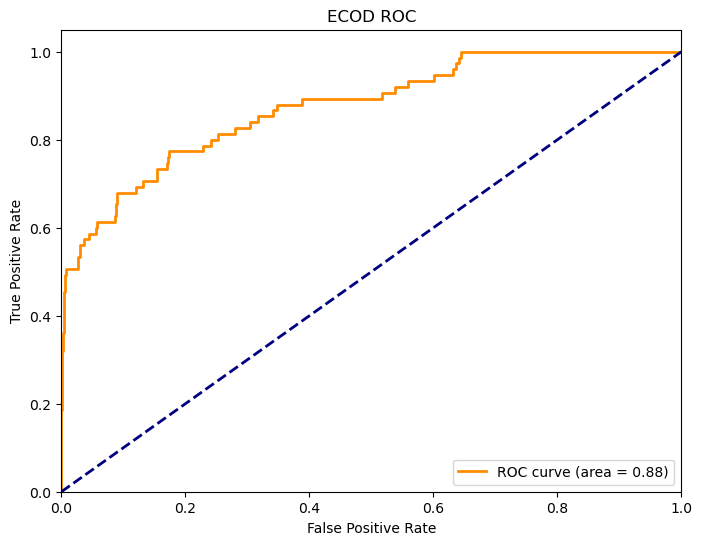

In [12]:
ecod_fpr, ecod_tpr, ecod_thresholds = roc_curve(y, ecod_score)
roc_auc = auc(ecod_fpr, ecod_tpr)
print(roc_auc)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(ecod_fpr, ecod_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ECOD ROC')
plt.legend(loc='lower right')
plt.show()

LUNAR

In [13]:
lunar = LUNAR()
lunar.fit(df)

LUNAR(contamination=0.1, epsilon=0.1, lr=0.001, model_type='WEIGHT',
   n_epochs=200, n_neighbours=5, negative_sampling='MIXED', proportion=1.0,
   scaler=MinMaxScaler(), val_size=0.1, verbose=0, wd=0.1)

In [14]:
lunar_score = lunar.decision_function(df)
lunar_score

array([-0.72961986, -0.47372913, -0.2852198 , ..., -0.7018024 ,
       -1.010183  , -0.35998607], dtype=float32)

In [15]:
lunar_pred = lunar.predict(df)
lunar_pred

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
lunar_acc = accuracy_score(y,lunar_pred)
lunar_acc

0.9103921568627451

0.9495747927031508


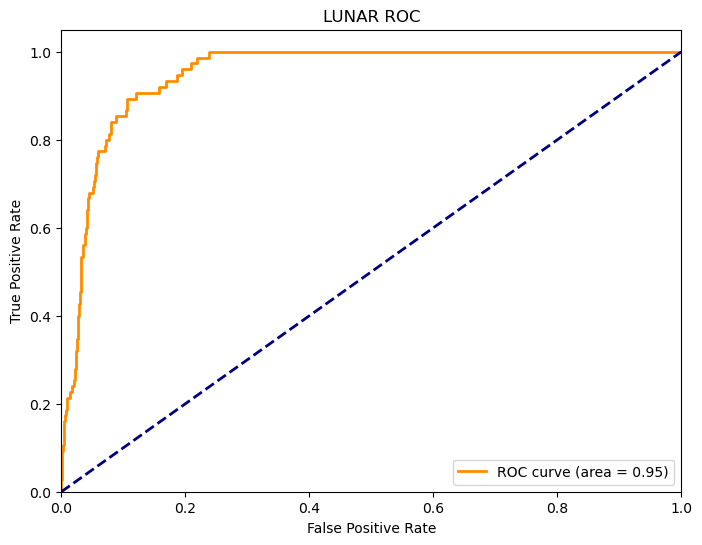

In [17]:
lunar_fpr, lunar_tpr, lunar_thresholds = roc_curve(y, lunar_score)
roc_auc = auc(lunar_fpr, lunar_tpr)
print(roc_auc)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(lunar_fpr, lunar_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LUNAR ROC')
plt.legend(loc='lower right')
plt.show()

In [18]:
y_array = y.values.ravel()

score_df = pd.DataFrame({'lunar_score': lunar_score, 'ecod_score': ecod_score, 'y': y_array})
score_df

,lunar_score,ecod_score,y
0,-0.729620,51.136784,0
1,-0.473729,70.126611,0
2,-0.285220,48.803419,0
3,-0.723676,54.906829,0
4,-0.273649,79.861533,0
...,...,...,...
5095,-0.887327,56.333132,0
5096,-0.502567,56.535979,0
5097,-0.701802,92.583860,0
5098,-1.010183,86.737465,0


In [19]:
x = score_df[['lunar_score', 'ecod_score']]
y = score_df['y']

In [20]:
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [21]:
y_pred_test = logreg.predict(x_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9853


In [23]:
print('Training set score: {:.4f}'.format(logreg.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(x_test, y_test)))

Training set score: 0.9904
Test set score: 0.9853


In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
cv_scores = cross_val_score(logreg, x, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Score: {np.mean(cv_scores)}')


Cross-Validation Scores: [0.99411765 0.99019608 0.98529412 0.98529412 0.99117647]
Average Cross-Validation Score: 0.9892156862745098


0.9755966832504146


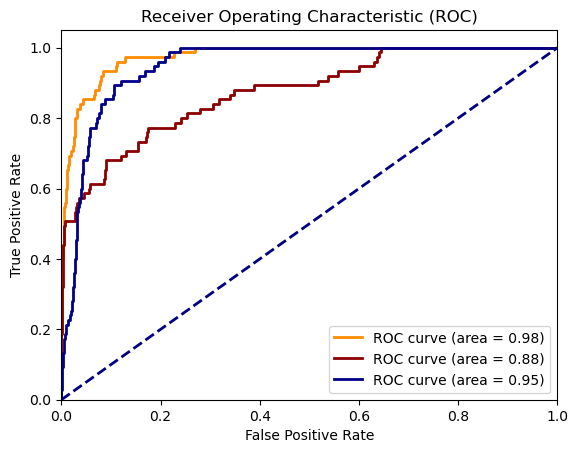

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Get predicted probabilities for the test set
y_prob = logreg.predict_proba(x)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)
roc_auc_ecod = auc(ecod_fpr, ecod_tpr)
roc_auc_lunar = auc(lunar_fpr, lunar_tpr)
print(roc_auc)
# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.plot(ecod_fpr, ecod_tpr, color='darkred', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_ecod)
plt.plot(lunar_fpr, lunar_tpr, color='darkblue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lunar)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [8]:
lunar_accuracies = []
ecod_accuracies = []
ensemble_accuracies = []
lunar_auc = []
ecod_auc = []
ensemble_auc = []

for i in range (10):
  lunar = LUNAR()
  lunar.fit(df)
  lunar_pred = lunar.predict(df)
  lunar_scores = lunar.decision_function(df)
  lunar_scores1 = lunar.decision_scores_
  lunar_acc = accuracy_score(y,lunar_pred)
  lunar_auc_scores = roc_auc_score(y, lunar_scores1)
  ecod = ECOD()
  ecod.fit(df)
  ecod_pred = ecod.predict(df)
  ecod_scores1 = ecod.decision_function(df)
  ecod_scores = ecod.decision_function(df)
  ecod_acc = accuracy_score(y,ecod_pred)
  ecod_auc_scores = roc_auc_score(y, ecod_scores1)

  y_array = y.values.ravel()

  score_df = pd.DataFrame({'lunar_score': lunar_scores, 'ecod_score': ecod_scores, 'y': y_array})
  score_df

  x = score_df[['lunar_score', 'ecod_score']]
  y = score_df['y']
  
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
  logreg = LogisticRegression(solver='liblinear', random_state=0)
  logreg.fit(x_train, y_train)
  y_pred_test = logreg.predict(x_test)
  
  ensemble_acc = accuracy_score(y_test,y_pred_test)
  y_prob = logreg.predict_proba(x)[:, 1]
  fpr, tpr, thresholds = roc_curve(y, y_prob)
  ensemble_auc_scores = auc(fpr, tpr)
  
  lunar_accuracies.append(lunar_acc)
  ecod_accuracies.append(ecod_acc)
  ensemble_accuracies.append(ensemble_acc)
  lunar_auc.append(lunar_auc_scores)
  ecod_auc.append(ecod_auc_scores)
  ensemble_auc.append(ensemble_auc_scores)


avg_lunar_acc = np.mean(lunar_accuracies)
avg_ecod_acc = np.mean(ecod_accuracies)
avg_ensemble_acc = np.mean(ensemble_accuracies)

avg_lunar_auc = np.mean(lunar_auc)
avg_ecod_auc = np.mean(ecod_auc)
avg_ensemble_auc = np.mean(ensemble_auc)


print(avg_lunar_acc,avg_ecod_acc,avg_ensemble_acc)

print(avg_lunar_auc,avg_ecod_auc,avg_ensemble_auc)

  

0.9099607843137253 0.905294117647059 0.988529411764706
0.9431609950248756 0.8751097844112771 0.9730690547263683
